In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Criando os Dados

Criando dados artificiais tal qual foi feito na primeira aula.

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

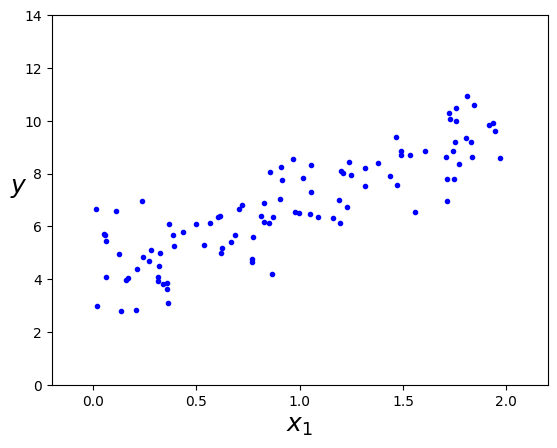

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-0.2, 2.2, 0, 14])
plt.show()

Criando novo DataFrame de features com a primeira coluna de 1's para a regressão linear (explicado o motivo para tal na primeira aula).

In [4]:
X_b = np.c_[np.ones((len(X), 1)), X]  # adiciona x0 = 1 pra cada instancia

X_new = np.array([min(X), max(X)]) # prevendo para cada o valor min e máx de X
X_new_b = np.c_[np.ones((2, 1)), X_new]  # adiciona x0 = 1 pra cada instancia
X_new_b

array([[1.        , 0.01404274],
       [1.        , 1.96858687]])

Calculando os parametros através do método de mínimos quadrados. Iremos buscar se aproximar de tais parâmetros em nossas aplicações de GD (Gradiente Descedente).

In [5]:
b1 = sum((X - X.mean())*(y - y.mean())) / sum((X - X.mean())**2)
b0 = y.mean() - X.mean()*b1
theta = np.concatenate([b0, b1]).reshape(2,1)
theta

array([[4.06996961],
       [2.84623221]])

# Gradiente Descendente

O Gradiente Descendente é um algoritmo de otimização que realiza o ajuste de parâmetros de forma iterativa com o objetivo de encontrar o valor de tais parâmetros que minimiza a função de custo escolhida.

Ou seja, no nosso caso de regressão linear, a reta que melhor se ajusta aos dados.

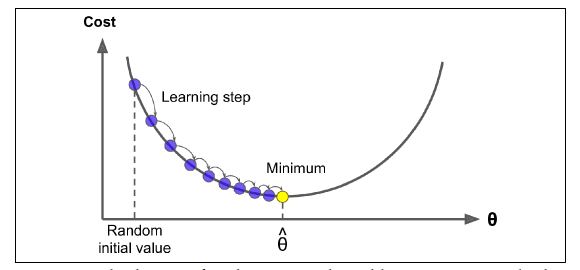

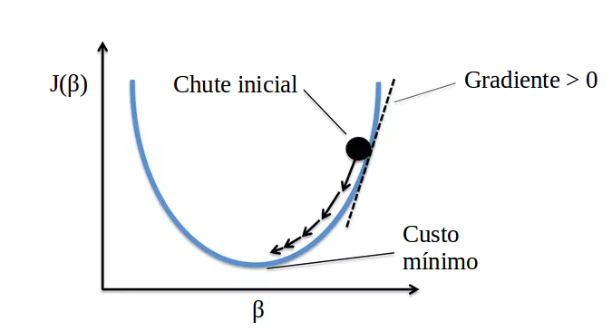

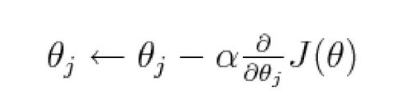


Os parâmetros são atualizados a cada passo de acordo com a derivada parcial da função de custo em relação aos parâmetros naquele ponto.

A direção e intensidade do passo depende de tal derivada.

Para o passo, tal derivida é multiplicada pela taxa de aprendizado/learning rate (alpha na imagem acima) para o algoritmo poder convergir (achar uma solução ótima) de uma maneira adequada.

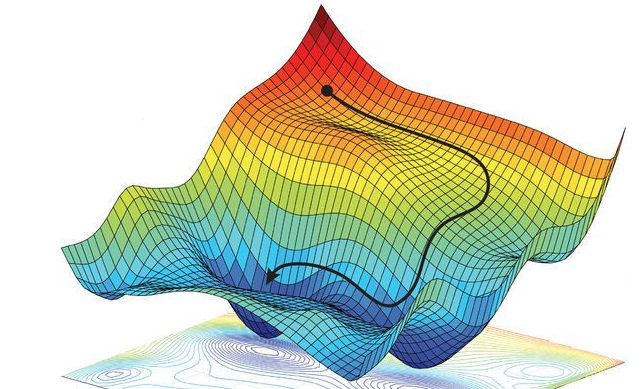

## Alguns problemas/preocupações

### Learning Rate baixo

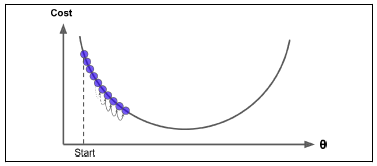

Em casos onde o learning rate é muito baixo é comum o algoritmo demorar demasiadamente para convergir gerando custos computacionais desnecessários.



### Learning Rate alto

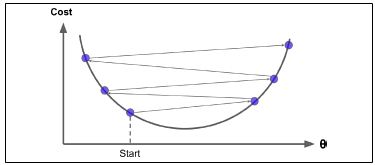

Quando o learning rate é muito alto o algoritmo pode nunca convergir por conta dos grandes passos não conseguirem levar o algoritmo na direção ótima.

### Problema de mínimo local/mínimo global e plateau

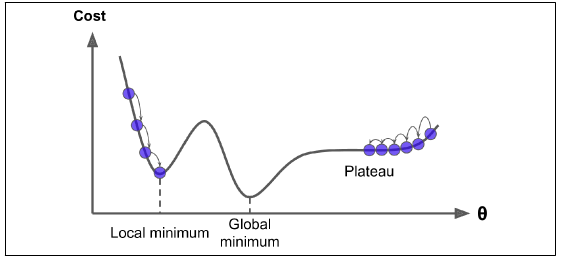

Por conta do algoritmo dar passos muitos pequenos conforme a derivada se aproxima de zero, ele pode parar em locais não ideais como mínimos locais e plateau's.

### Problema de Scalling das features

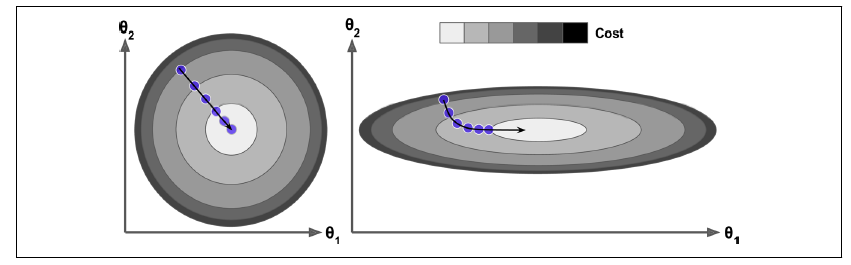

Escalar as features antes de aplicar o GD se faz extremamente necessário para não gastar mais recursos computacionais correndo um "caminho de covergência" mais longo.

## GD em batch (lote)

No Gradiente Descendente em lote ou Batch Gradient Descent calcula-se o gradiente usando todo o dataset de treinamento em cada iteração, para atualizar os parâmetros.

Atenção para o fato de que se o número de exemplos de treinamento for grande, então o gradiente descendente em lote é computacionalmente muito caro! 

Imagine se você tem 10000 dados, cada dado com 10 features, são 100mil valores para computar a cada iteração, em cada época...

Vetor gradiente da função de custo.

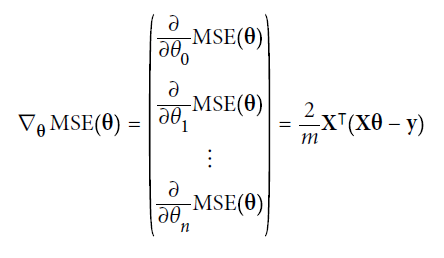


Repare que a formula utiliza todos os elementos da base de treino, por isso o nome "Batch". Em grandes bases de dados pode ser que a rodagem seja bem demorada.

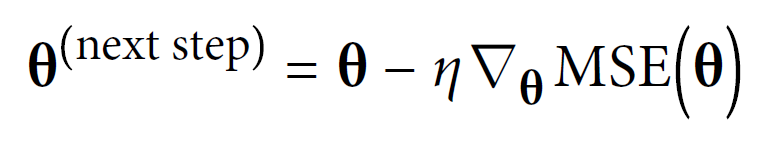

Atualizamos o theta subtraindo o seu gradiente vezes o learning rate

Theta inicial: [[0.45836476]
 [0.64727191]]
Theta final: [[4.06996961]
 [2.84623221]]


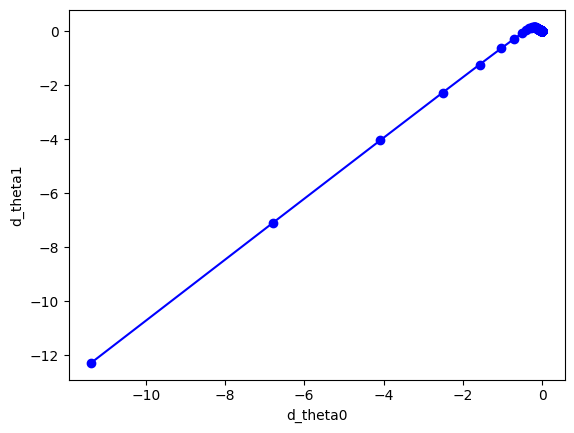

In [6]:
eta = 0.1  # learning rate
n_iterations = 1000
m = X.shape[0]

theta = np.random.randn(2,1)  # random initialization
print(f'Theta inicial: {theta}')

list_gradients = []
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    list_gradients.append(gradients)


list_gradients = np.array(list_gradients).reshape(1000,2)
plt.plot(list_gradients[:,0],list_gradients[:,1], 'b-o')
plt.xlabel('d_theta0')
plt.ylabel('d_theta1')
print(f'Theta final: {theta}')

In [7]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

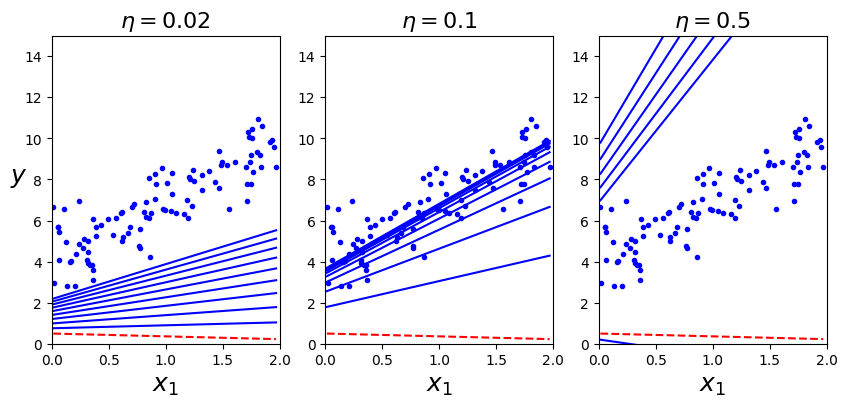

In [8]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

Podemos ver os problemas citados anteriormente com learning rate baixo e alto.

## GD estocástico (instância única)

O GD Estocástico escolhe aleatoriamente uma instância do conjunto de treinamento e realiza o cálculo do gradiente baseado apenas nesta instância.

Isso torna o algoritmo mais rápido devido a pequena quantidade de dados para manipular a cada iteração.

Além disso, permite realizar o treinamento em grandes conjuntos de dados que não cabem na memória principal (out-of-core learning), visto que apenas uma instância precisa estar na memória a cada iteração.

Devido a sua aleatoriedade, esse algoritmo é menos regular do que o GD em Lote, em vez de diminuir suavemente até o mínimo, a função custo irá oscilar e diminuir na média.

Dessa forma, os valores obtidos serão bons, mas não ótimos.

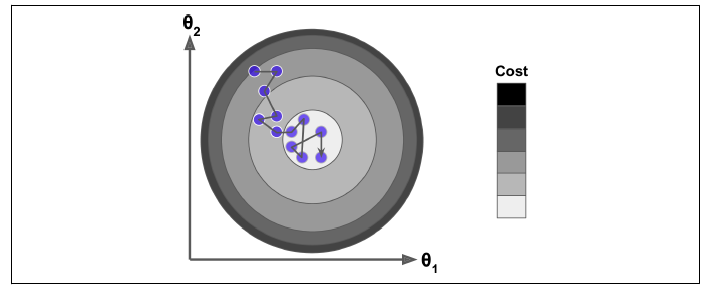

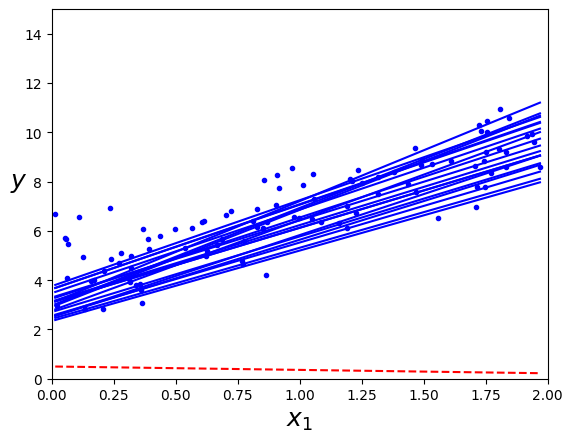

In [9]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
list_gradients = []

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)          
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                
        list_gradients.append(gradients)

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                            
plt.show()                                           

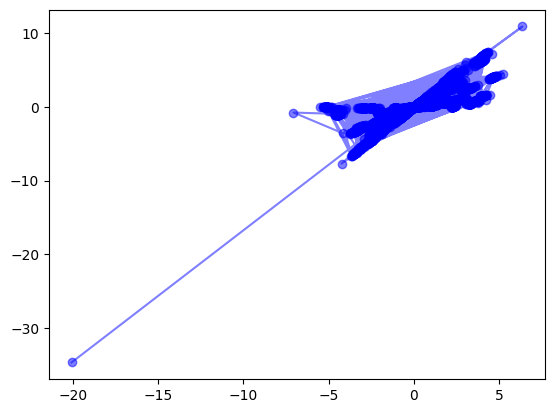

In [10]:
list_gradients =np.array(list_gradients)
list_gradients = list_gradients.reshape(5000,2)
plt.plot(list_gradients[:,0],list_gradients[:,1], 'b-o', alpha = 0.5)

## GD em mini-batch

Diferentemente do GD em Lotes que utiliza todo o conjunto de treinamento em cada etapa ou do GD Estocástico que calcula os gradientes com base em apenas uma única instância por iteração, o GD em Minilotes utiliza pequenos conjuntos aleatórios de dados chamados minilotes para obter os gradientes.

Como resultado, o GD em Minilotes é mais regular do que o GD Estocástico, ficando mais próximo do mínimo.

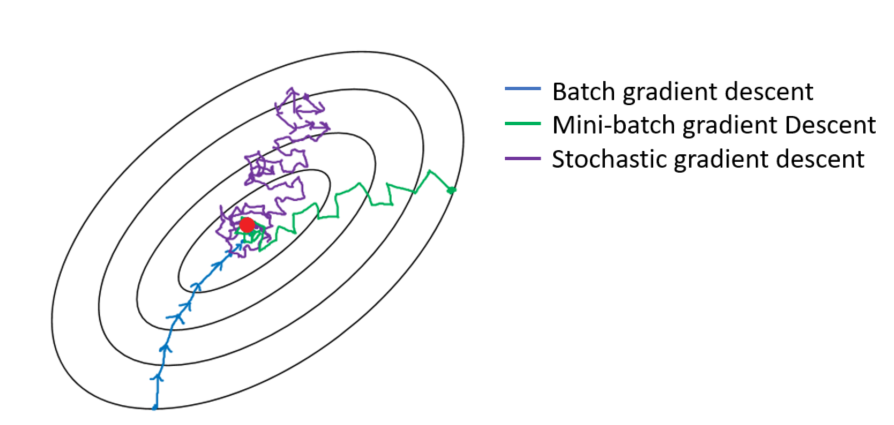

In [11]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

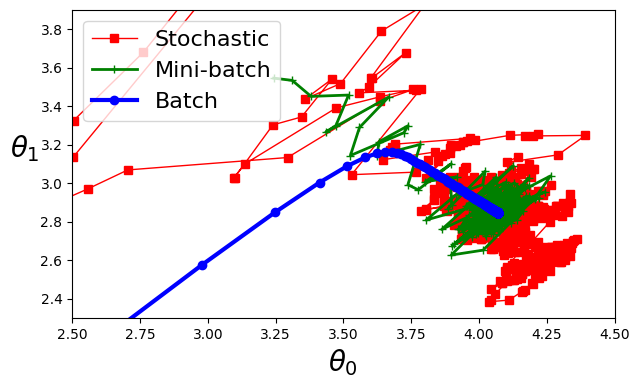

In [12]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

Podemos ver, na prática, a diferença dos caminhos dos parâmetros para cada algoritmo.

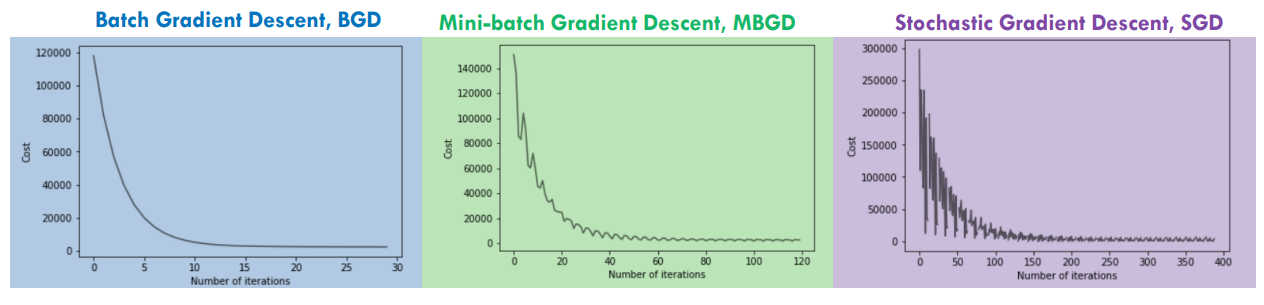

                                                                                            obs.: imagem meramente ilustrativa e não representa a aplicação desta aula

# Resumo até o momento

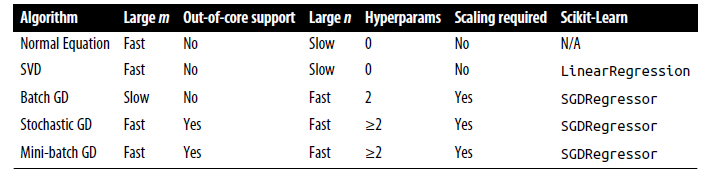